<a href="https://colab.research.google.com/github/samaneh-m/Applied-Bayesian-data-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip -q install kagglehub


In [5]:
import kagglehub

path = kagglehub.dataset_download(
    "vivianyfwang/capital-bike-share-2018-20218"
)

print("Dataset downloaded to:", path)


100%|██████████| 605k/605k [00:00<00:00, 24.8MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/vivianyfwang/capital-bike-share-2018-20218/versions/2


In [6]:
import os

os.listdir(path)

['capitalbikeshare-complete.csv']

In [7]:
import os

csv_path = os.path.join(path, "capitalbikeshare-complete.csv")
csv_path


'/root/.cache/kagglehub/datasets/vivianyfwang/capital-bike-share-2018-20218/versions/2/capitalbikeshare-complete.csv'

In [8]:
import pandas as pd

df = pd.read_csv(csv_path)

df.shape


(33379, 16)

In [9]:
df.columns

Index(['datetime', 'count', 'holiday', 'workingday', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main'],
      dtype='object')

In [10]:
df

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.60,310,NaN,NaN,20,Clouds
1,2018-01-01 01:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.60,310,NaN,NaN,1,Clear
2,2018-01-01 02:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.10,310,NaN,NaN,1,Clear
3,2018-01-01 03:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.10,310,NaN,NaN,1,Clear
4,2018-01-01 04:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.10,330,NaN,NaN,1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,NaN,90,Rain
33375,2021-08-31 20:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,NaN,90,Rain
33376,2021-08-31 21:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,NaN,NaN,90,Clouds
33377,2021-08-31 22:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,NaN,NaN,90,Clouds


In [11]:
import pandas as pd

cols_needed = [
    "datetime",
    "count",
    "temp",
    "humidity",
    "wind_speed",
    "rain_1h",
    "snow_1h",
    "workingday",
    "holiday"
]

df = df[cols_needed]
df.head()


,datetime,count,temp,humidity,wind_speed,rain_1h,snow_1h,workingday,holiday
0,2018-01-01 00:00,34,-7.17,53,3.6,NaN,NaN,0,1
1,2018-01-01 01:00,49,-7.35,49,4.6,NaN,NaN,0,1
2,2018-01-01 02:00,37,-7.88,52,4.1,NaN,NaN,0,1
3,2018-01-01 03:00,9,-8.10,49,4.1,NaN,NaN,0,1
4,2018-01-01 04:00,12,-8.19,49,4.1,NaN,NaN,0,1


In [12]:
df["rain_1h"] = df["rain_1h"].fillna(0.0)
df["snow_1h"] = df["snow_1h"].fillna(0.0)

/tmp/ipython-input-3335008184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rain_1h"] = df["rain_1h"].fillna(0.0)
/tmp/ipython-input-3335008184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["snow_1h"] = df["snow_1h"].fillna(0.0)


In [13]:
df.isna().sum()


,0
datetime,0
count,0
temp,0
humidity,0
wind_speed,0
rain_1h,0
snow_1h,0
workingday,0
holiday,0


In [14]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.weekday  # 0=Mon, 6=Sun


/tmp/ipython-input-2082913697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df["datetime"])
/tmp/ipython-input-2082913697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hour"] = df["datetime"].dt.hour
/tmp/ipython-input-2082913697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [15]:
df[["datetime", "hour", "day_of_week"]].head()


,datetime,hour,day_of_week
0,2018-01-01 00:00:00,0,0
1,2018-01-01 01:00:00,1,0
2,2018-01-01 02:00:00,2,0
3,2018-01-01 03:00:00,3,0
4,2018-01-01 04:00:00,4,0


In [16]:
df

,datetime,count,temp,humidity,wind_speed,rain_1h,snow_1h,workingday,holiday,hour,day_of_week
0,2018-01-01 00:00:00,34,-7.17,53,3.60,0.00,0.0,0,1,0,0
1,2018-01-01 01:00:00,49,-7.35,49,4.60,0.00,0.0,0,1,1,0
2,2018-01-01 02:00:00,37,-7.88,52,4.10,0.00,0.0,0,1,2,0
3,2018-01-01 03:00:00,9,-8.10,49,4.10,0.00,0.0,0,1,3,0
4,2018-01-01 04:00:00,12,-8.19,49,4.10,0.00,0.0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
33374,2021-08-31 19:00:00,659,28.78,73,0.45,1.00,0.0,1,0,19,1
33375,2021-08-31 20:00:00,404,28.52,74,0.45,0.25,0.0,1,0,20,1
33376,2021-08-31 21:00:00,259,28.22,75,0.45,0.00,0.0,1,0,21,1
33377,2021-08-31 22:00:00,192,27.51,76,2.06,0.00,0.0,1,0,22,1


In [17]:
df['day_of_week'].unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [18]:
df.describe()


,datetime,count,temp,humidity,wind_speed,rain_1h,snow_1h,workingday,holiday,hour,day_of_week
count,33379,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000
mean,2019-10-25 07:31:08.755804416,333.139788,15.213087,67.818628,1.829340,0.246256,0.006264,0.681327,0.030618,11.490937,3.001738
min,2018-01-01 00:00:00,0.000000,-12.790000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-11-21 12:30:00,59.000000,6.860000,53.000000,0.450000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,2019-10-14 23:00:00,236.000000,15.650000,70.000000,1.340000,0.000000,0.000000,1.000000,0.000000,11.000000,3.000000
75%,2020-10-08 03:30:00,495.000000,23.800000,84.000000,2.600000,0.000000,0.000000,1.000000,0.000000,17.000000,5.000000
max,2021-08-31 23:00:00,2038.000000,36.710000,100.000000,16.980000,37.080000,3.300000,1.000000,1.000000,23.000000,6.000000
std,NaN,336.519514,9.908964,18.422105,1.703747,1.025077,0.084582,0.465969,0.172283,6.923674,2.008922


In [19]:
df.dtypes


,0
datetime,datetime64[ns]
count,int64
temp,float64
humidity,int64
wind_speed,float64
rain_1h,float64
snow_1h,float64
workingday,int64
holiday,int64
hour,int32


In [20]:
df["count"].describe()


,count
count,33379.000000
mean,333.139788
std,336.519514
min,0.000000
25%,59.000000
50%,236.000000
75%,495.000000
max,2038.000000


5.2 Variance vs mean (core diagnostic)


In [21]:
mean_count = df["count"].mean()
var_count = df["count"].var()

mean_count, var_count


(np.float64(333.139788489769), 113245.38347854714)

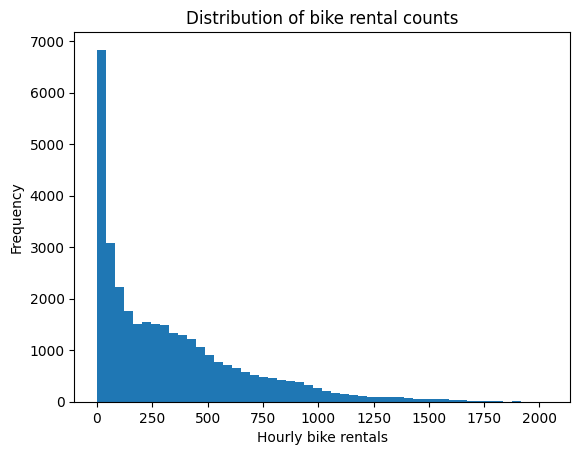

In [22]:
import matplotlib.pyplot as plt

plt.hist(df["count"], bins=50)
plt.xlabel("Hourly bike rentals")
plt.ylabel("Frequency")
plt.title("Distribution of bike rental counts")
plt.show()


In [23]:
grouped = df.groupby("hour")["count"]
(grouped.mean().head(), grouped.var().head())


(hour
 0    71.134006
 1    40.123199
 2    25.271879
 3    13.785867
 4    15.055954
 Name: count, dtype: float64,
 hour
 0    4607.271143
 1    2075.728863
 2    1068.043042
 3     301.735543
 4      62.348626
 Name: count, dtype: float64)

First Bayesian model: Poisson regression (baseline)

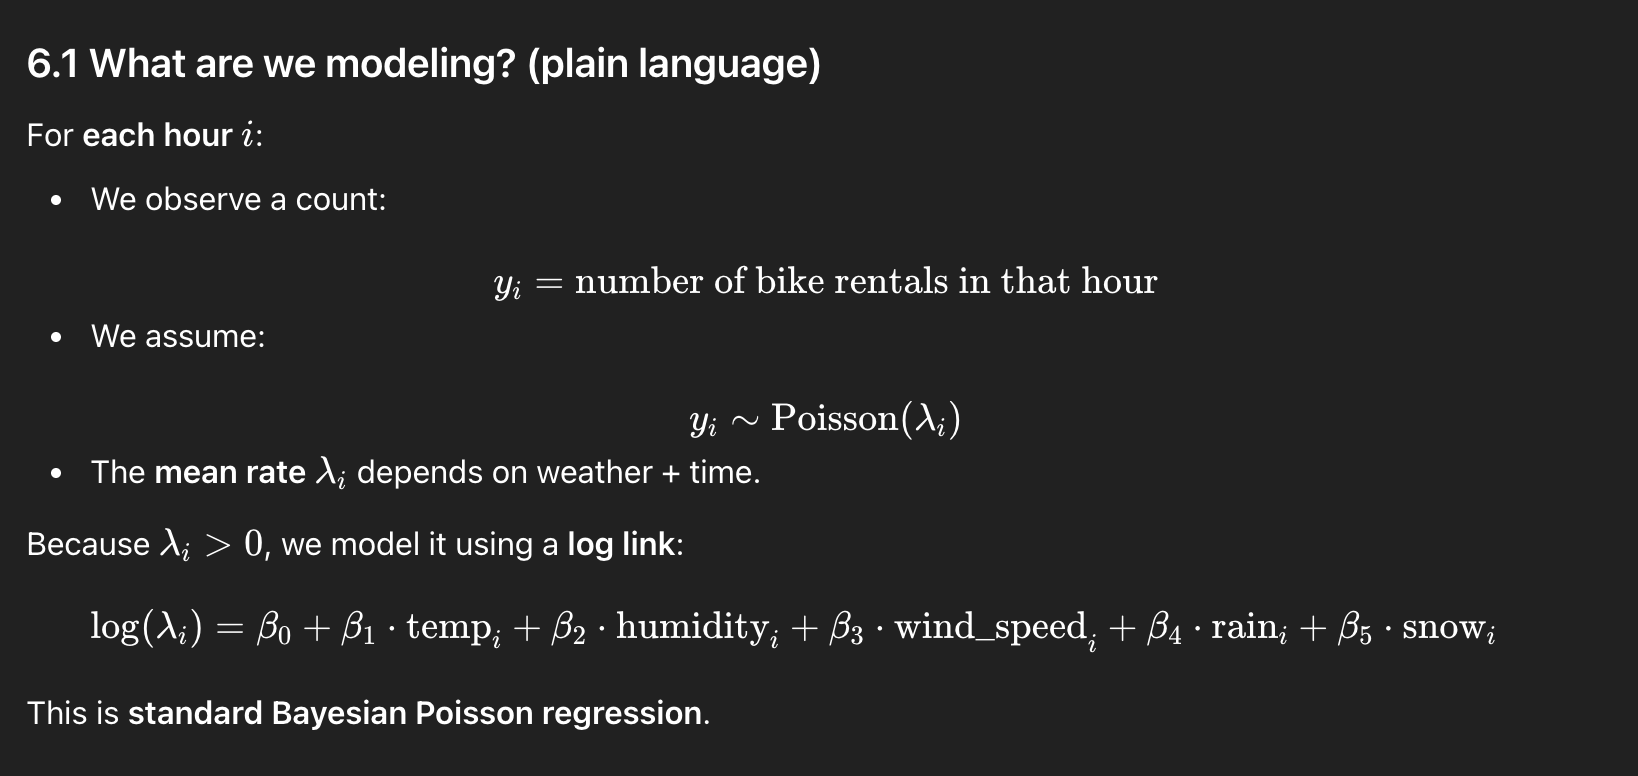

In [24]:
!pip -q install pymc arviz


Prepare data for modeling

In [25]:
import numpy as np

# Copy to avoid modifying original df
df_model = df.copy()

# Continuous predictors
cont_vars = ["temp", "humidity", "wind_speed", "rain_1h", "snow_1h"]

for v in cont_vars:
    df_model[v] = (df_model[v] - df_model[v].mean()) / df_model[v].std()

y = df_model["count"].values
X = df_model[cont_vars].values


Specify the Bayesian Poisson model

In [26]:
import pymc as pm

with pm.Model() as poisson_model:

    # Priors
    beta_0 = pm.Normal("beta_0", mu=0, sigma=5)
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X.shape[1])

    # Linear predictor
    eta = beta_0 + pm.math.dot(X, beta)

    # Mean parameter (must be positive)
    mu = pm.math.exp(eta)

    # Likelihood
    y_obs = pm.Poisson("y_obs", mu=mu, observed=y)

    # Sampling
    trace_poisson = pm.sample(
        1000,
        tune=1000,
        chains=2,
        target_accept=0.9,
        random_seed=42
    )


Output()

array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

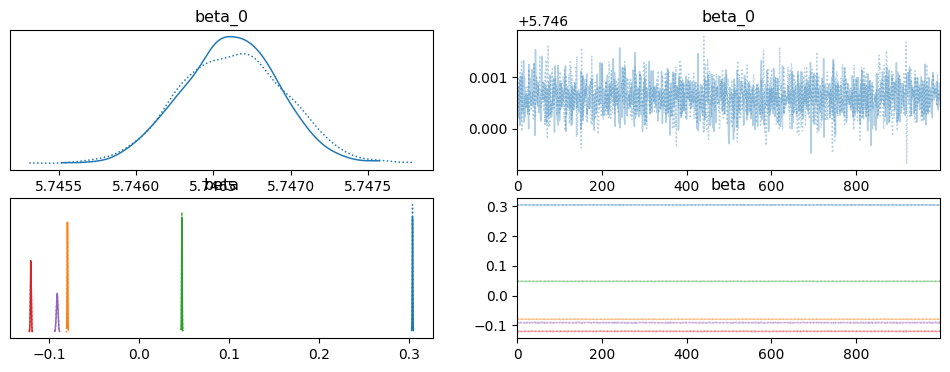

In [27]:
import arviz as az

az.plot_trace(trace_poisson, var_names=["beta_0", "beta"])


Posterior Predictive Check (PPC)

This step answers “Is the Poisson model a good model for the data?”
Not by theory — by simulation.

In [28]:
with poisson_model:
    ppc_poisson = pm.sample_posterior_predictive(
        trace_poisson,
        var_names=["y_obs"],
        random_seed=42
    )


Output()

Compare distributions (visual check)
Plot real vs simulated data

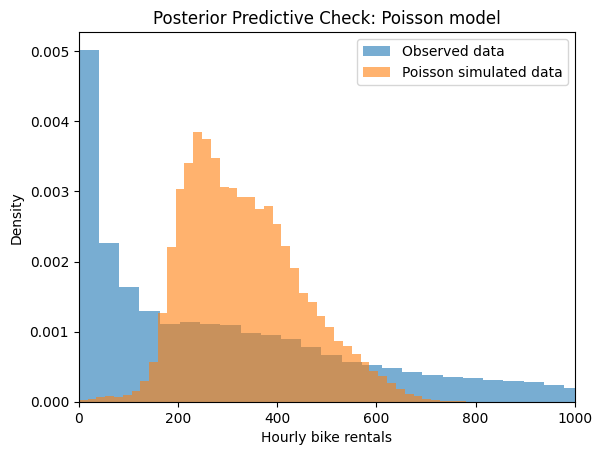

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Observed data (real bike counts)
y_real = df["count"].values

# Simulated data from posterior predictive
y_sim = ppc_poisson.posterior_predictive["y_obs"].values.flatten()

# Plot normalized histograms (densities, not frequencies)
plt.hist(
    y_real,
    bins=50,
    density=True,
    alpha=0.6,
    label="Observed data"
)

plt.hist(
    y_sim,
    bins=50,
    density=True,
    alpha=0.6,
    label="Poisson simulated data"
)

# Zoom into the meaningful range (optional but recommended)
plt.xlim(0, 1000)

plt.xlabel("Hourly bike rentals")
plt.ylabel("Density")
plt.title("Posterior Predictive Check: Poisson model")
plt.legend()
plt.show()


Bayesian Negative Binomial regression (the correct model)

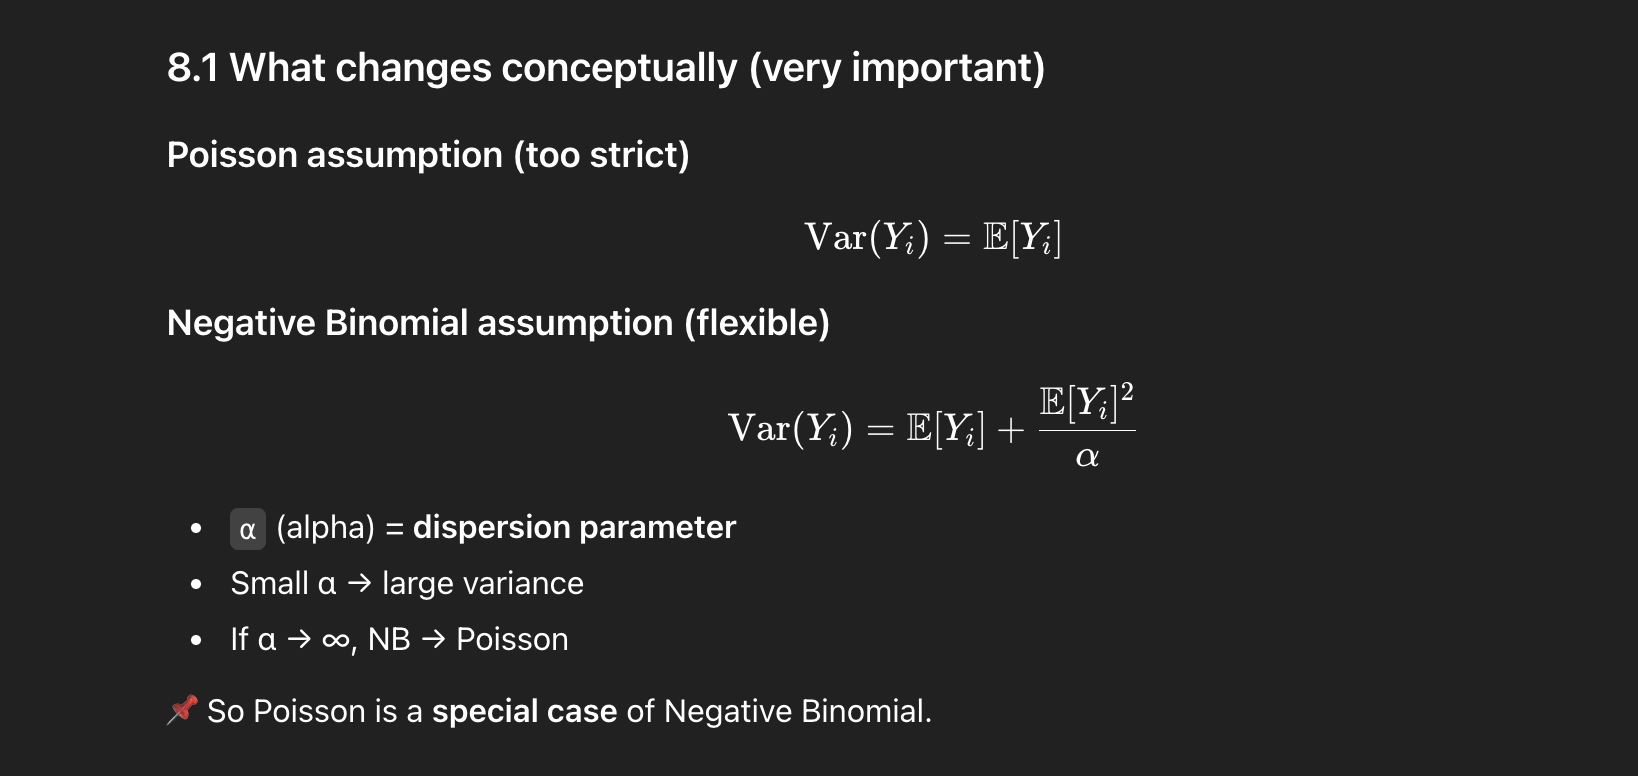

In [30]:
import pymc as pm

with pm.Model() as nb_model:

    # Priors (same as Poisson)
    beta_0 = pm.Normal("beta_0", mu=0, sigma=5)
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X.shape[1])

    # Dispersion parameter (new!)
    alpha = pm.Exponential("alpha", 1.0)

    # Linear predictor
    eta = beta_0 + pm.math.dot(X, beta)
    mu = pm.math.exp(eta)

    # Likelihood
    y_obs = pm.NegativeBinomial(
        "y_obs",
        mu=mu,
        alpha=alpha,
        observed=y
    )

    # Sampling
    trace_nb = pm.sample(
        2000,
        tune=2000,
        chains=4,
        target_accept=0.9,
        random_seed=42
    )


Output()

Convergence diagnostics (agreement of chains)
(A) Trace plots (visual agreement)

array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>]], dtype=object)

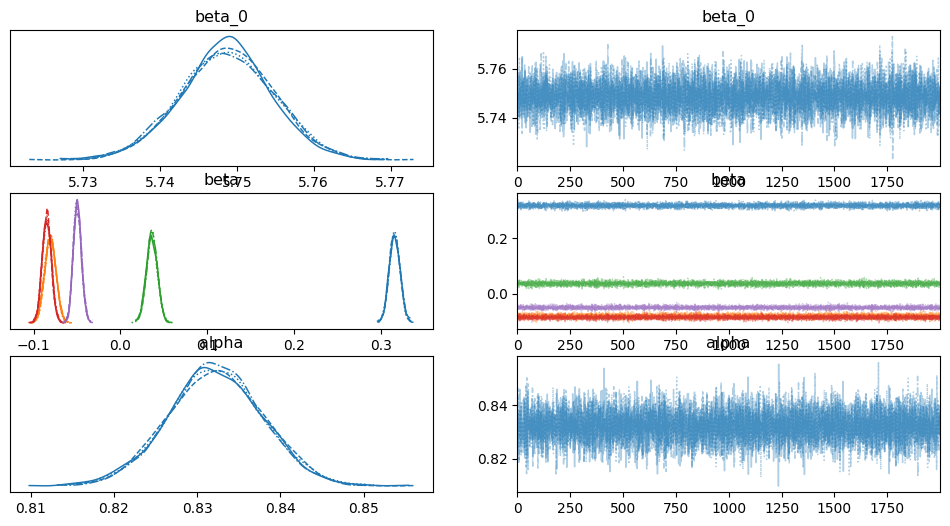

In [31]:
import arviz as az

az.plot_trace(trace_nb, var_names=["beta_0", "beta", "alpha"])


(B) R-hat and ESS (numerical agreement)

In [32]:
az.summary(trace_nb, var_names=["beta_0", "beta", "alpha"])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,5.749,0.006,5.737,5.760,0.0,0.0,11731.0,6058.0,1.0
beta[0],0.316,0.006,0.305,0.328,0.0,0.0,12947.0,5813.0,1.0
beta[1],-0.081,0.006,-0.093,-0.069,0.0,0.0,10760.0,6820.0,1.0
beta[2],0.036,0.006,0.025,0.048,0.0,0.0,12318.0,6451.0,1.0
beta[3],-0.085,0.005,-0.094,-0.075,0.0,0.0,11319.0,6306.0,1.0
beta[4],-0.050,0.005,-0.058,-0.041,0.0,0.0,12421.0,6458.0,1.0
alpha,0.832,0.006,0.822,0.843,0.0,0.0,12708.0,6235.0,1.0


9.2 Posterior Predictive Check (NB vs reality)

This is the decisive comparison.

(A) Generate posterior predictive samples

In [33]:
with nb_model:
    ppc_nb = pm.sample_posterior_predictive(
        trace_nb,
        var_names=["y_obs"],
        random_seed=42
    )


Output()

(B) Plot observed vs NB-simulated data (final code)

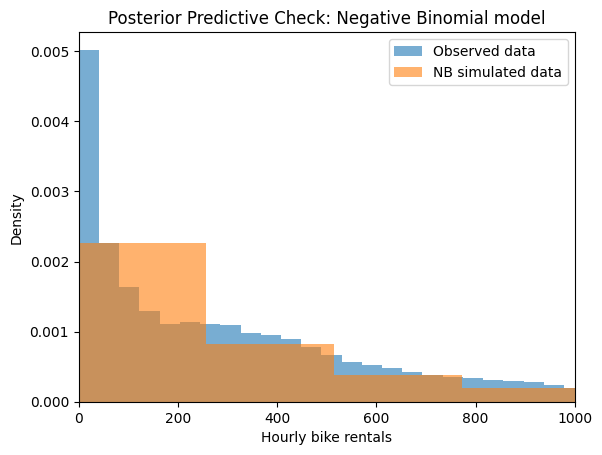

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Observed data
y_real = df["count"].values

# NB simulated data
y_sim_nb = ppc_nb.posterior_predictive["y_obs"].values.flatten()

plt.hist(y_real, bins=50, density=True, alpha=0.6, label="Observed data")
plt.hist(y_sim_nb, bins=50, density=True, alpha=0.6, label="NB simulated data")

plt.xlim(0, 1000)
plt.xlabel("Hourly bike rentals")
plt.ylabel("Density")
plt.title("Posterior Predictive Check: Negative Binomial model")
plt.legend()
plt.show()


third model

In [35]:
!pip -q install pymc arviz pandas numpy matplotlib

In [36]:
import pymc as pm
import arviz as az

In [37]:
print(df.shape)
print(df.columns)
df.isna().sum().sort_values(ascending=False).head(15)


(33379, 11)
Index(['datetime', 'count', 'temp', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'workingday', 'holiday', 'hour', 'day_of_week'],
      dtype='object')


,0
datetime,0
count,0
temp,0
humidity,0
wind_speed,0
rain_1h,0
snow_1h,0
workingday,0
holiday,0
hour,0


Step 2 — Create the hour index for partial pooling
What we are doing (conceptually)

We want to give each hour (0–23) its own baseline effect,
but not estimate them independently.

So we:

Convert hour into an index

Use it to index a random effect vector later

In [41]:
# Convert hour column to integer index (0–23)
hour_idx = df["hour"].astype(int).values

# Number of unique hours
n_hours = df["hour"].nunique()

print("Number of hours:", n_hours)
print("Hour index example:", hour_idx[:24])


Number of hours: 24
Hour index example: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [42]:
# Response variable
y = df["count"].values

# Weather covariates (same as Model 2)
X = df[["temp", "humidity", "wind_speed", "rain_1h", "snow_1h"]].values

print("y shape:", y.shape)
print("X shape:", X.shape)


y shape: (33379,)
X shape: (33379, 5)


In [44]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_stdzd = (X - X_mean) / X_std
print(X_mean)
print(X_std)

[1.52130867e+01 6.78186285e+01 1.82934030e+00 2.46256029e-01
 6.26411816e-03]
[ 9.90881602 18.4218292   1.70372178  1.02506172  0.0845811 ]


Step 3 — Build the Seasonal (hour) Bayesian model

In [45]:
with pm.Model() as nb_hour_model:

    # -----------------------
    # Priors
    # -----------------------

    # Intercept
    alpha = pm.Normal("alpha", mu=0.0, sigma=2.0)

    # Weather coefficients
    beta = pm.Normal("beta", mu=0.0, sigma=1.0, shape=X_stdzd.shape[1])

    # Hour random effect (partial pooling)
    sigma_hour = pm.HalfNormal("sigma_hour", sigma=1.0)
    hour_effect = pm.Normal(
        "hour_effect",
        mu=0.0,
        sigma=sigma_hour,
        shape=n_hours
    )

    # -----------------------
    # Linear predictor
    # -----------------------

    eta = (
        alpha
        + pm.math.dot(X_stdzd, beta)
        + hour_effect[hour_idx]
    )

    mu = pm.math.exp(eta)

    # -----------------------
    # Likelihood
    # -----------------------

    phi = pm.HalfNormal("phi", sigma=2.0)

    y_obs = pm.NegativeBinomial(
        "y_obs",
        mu=mu,
        alpha=phi,
        observed=y
    )


Step 4 — Sample Model 3 (Negative Binomial + hour random effects)
4.1 Run MCMC sampling

In [46]:
with nb_hour_model:
    idata_nb_hour = pm.sample(
        draws=1000,
        tune=1000,
        chains=2,
        target_accept=0.9,
        random_seed=42
    )


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [47]:
az.summary(
    idata_nb_hour,
    var_names=["alpha", "beta", "sigma_hour", "phi"],
    round_to=3
)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,5.160,0.260,4.701,5.711,0.030,0.018,74.021,103.134,1.012
beta[0],0.388,0.004,0.380,0.394,0.000,0.000,688.314,608.720,1.002
beta[1],-0.101,0.004,-0.109,-0.093,0.000,0.000,616.189,682.317,1.000
beta[2],0.035,0.004,0.028,0.041,0.000,0.000,623.398,659.005,1.004
beta[3],-0.046,0.003,-0.052,-0.040,0.000,0.000,621.274,604.011,1.002
beta[4],-0.057,0.003,-0.063,-0.052,0.000,0.000,550.157,725.419,1.004
sigma_hour,1.279,0.180,0.924,1.600,0.007,0.006,582.334,559.653,1.001
phi,2.644,0.021,2.606,2.681,0.001,0.001,766.600,709.955,1.007


4.3 Check divergences (very important)

In [48]:
idata_nb_hour.sample_stats["diverging"].sum().values


array(0)

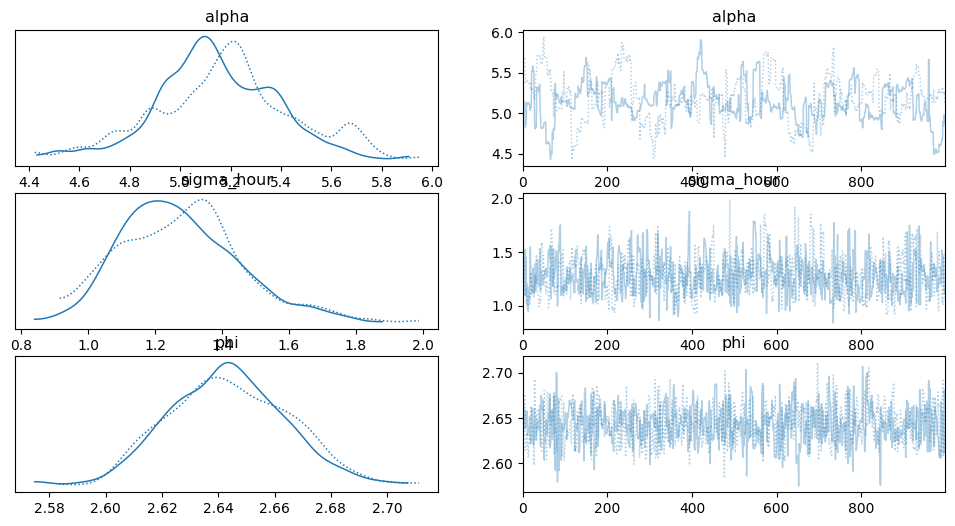

In [49]:
az.plot_trace(idata_nb_hour, var_names=["alpha", "sigma_hour", "phi"])
plt.show()


Step 5 — Interpret the Seasonal (hour) Model

(no new modeling, only understanding results)

We will do two small things in this step:

1️⃣ Interpret hour-to-hour variability (this is the “seasonal / structured” part)
2️⃣ Make sure weather effects still make sense

In [51]:
sigma_hour = 1.279
HDI = [0.924, 1.600]


/tmp/ipython-input-2042913243.py:10: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hour_hdi = az.hdi(hour_effect_flat, hdi_prob=0.94)


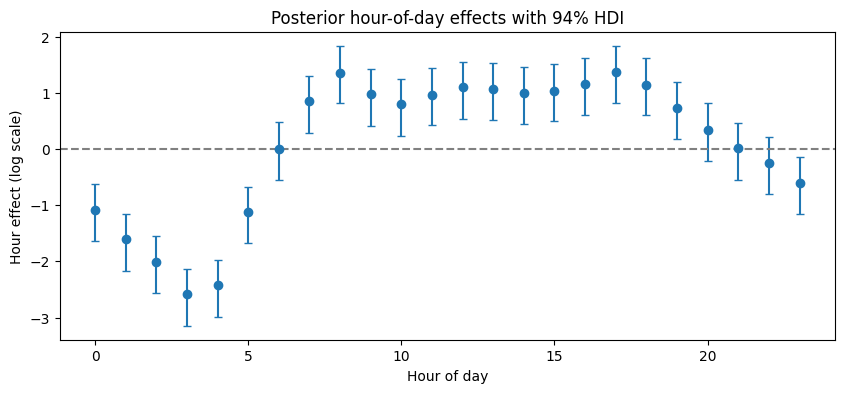

In [52]:
# Extract posterior samples of hour effects
hour_effect_samples = idata_nb_hour.posterior["hour_effect"].values
# shape: (chains, draws, 24)

# Combine chains
hour_effect_flat = hour_effect_samples.reshape(-1, hour_effect_samples.shape[-1])

# Posterior summaries
hour_mean = hour_effect_flat.mean(axis=0)
hour_hdi = az.hdi(hour_effect_flat, hdi_prob=0.94)

# Plot
plt.figure(figsize=(10, 4))
plt.errorbar(
    x=np.arange(24),
    y=hour_mean,
    yerr=[
        hour_mean - hour_hdi[:, 0],
        hour_hdi[:, 1] - hour_mean
    ],
    fmt="o",
    capsize=3
)
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Hour of day")
plt.ylabel("Hour effect (log scale)")
plt.title("Posterior hour-of-day effects with 94% HDI")
plt.show()


Step 6 — Compare Model 2 vs Model 3 (weather effects)

Now we answer the core research question:

Does adding temporal structure change weather–demand inference?

We do this by comparing weather coefficients:

Model 2: NegBin (no hour effects)

Model 3: NegBin + hour effects

In [53]:
# Weather coefficient samples from Model 3
beta_hour = idata_nb_hour.posterior["beta"].values
# shape: (chains, draws, 5)

# Flatten chains
beta_hour_flat = beta_hour.reshape(-1, beta_hour.shape[-1])


In [55]:
trace_nb # Model 2 posterior


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Step 6 (clean & final) — Compare weather effects
Step 6.1 — Extract weather coefficients

In [57]:
# Model 2 (no temporal structure)
beta_nb = trace_nb.posterior["beta"].values
beta_nb_flat = beta_nb.reshape(-1, beta_nb.shape[-1])

# Model 3 (with hour effects)
beta_hour = idata_nb_hour.posterior["beta"].values
beta_hour_flat = beta_hour.reshape(-1, beta_hour.shape[-1])


In [60]:
def summarize_posterior(samples, hdi_prob=0.94):
    mean = samples.mean()
    hdi = az.hdi(samples, hdi_prob=hdi_prob)
    return mean, hdi


In [68]:
def plot_variable_comparison(
    samples_m2,
    samples_m3,
    label,
    xlim=None,
    legend_loc="center left",
    legend_bbox=(1.02, 0.5)
):
    fig, ax = plt.subplots(figsize=(7, 4))

    # summaries
    mean2, hdi2 = summarize_posterior(samples_m2)
    mean3, hdi3 = summarize_posterior(samples_m3)

    # densities
    plot_density(
        ax,
        samples_m2,
        color="gray",
        label=(
            f"Model 2 (gray)\n"
            f"mean={mean2:.3f}\n"
            f"94% HDI=[{hdi2[0]:.3f}, {hdi2[1]:.3f}]"
        )
    )

    plot_density(
        ax,
        samples_m3,
        color="royalblue",
        label=(
            f"Model 3 (blue)\n"
            f"mean={mean3:.3f}\n"
            f"94% HDI=[{hdi3[0]:.3f}, {hdi3[1]:.3f}]"
        )
    )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(label, fontsize=13)
    ax.set_ylabel("Posterior density")
    ax.set_xlabel("Effect size")

    if xlim is not None:
        ax.set_xlim(xlim)

    # LEGEND — fully controllable
    ax.legend(
        loc=legend_loc,
        bbox_to_anchor=legend_bbox,
        frameon=True,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

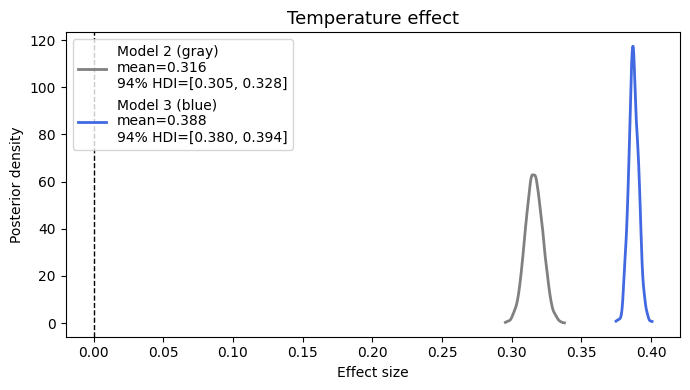

In [76]:
plot_variable_comparison(
    beta_nb_flat[:, 0],
    beta_hour_flat[:, 0],
    label="Temperature effect",
    legend_loc="upper left",
    legend_bbox=None
)

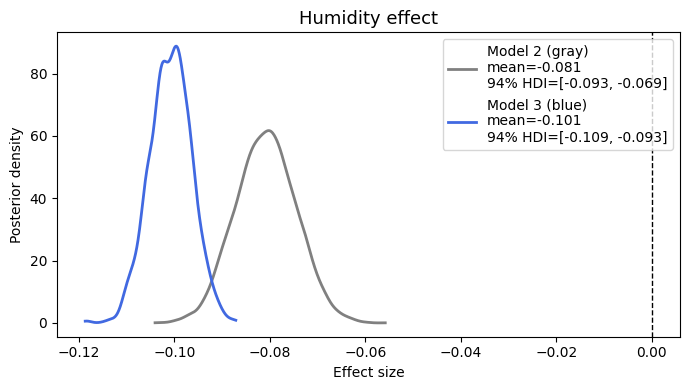

In [75]:
plot_variable_comparison(
    beta_nb_flat[:, 1],
    beta_hour_flat[:, 1],
    label="Humidity effect",
    legend_loc="upper right",
    legend_bbox=None
)

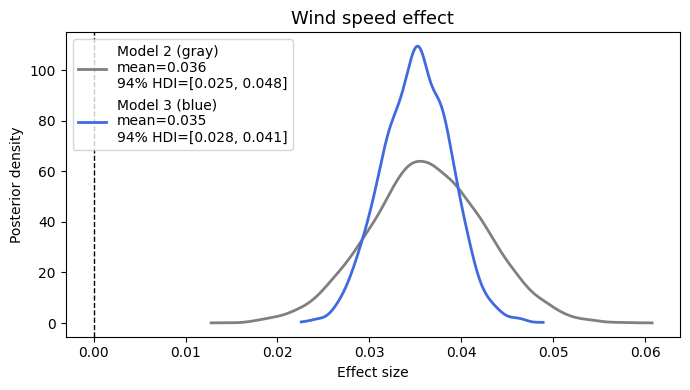

In [71]:
plot_variable_comparison(
    beta_nb_flat[:, 2],
    beta_hour_flat[:, 2],
    label="Wind speed effect",
    legend_loc="upper left",
    legend_bbox=None
)

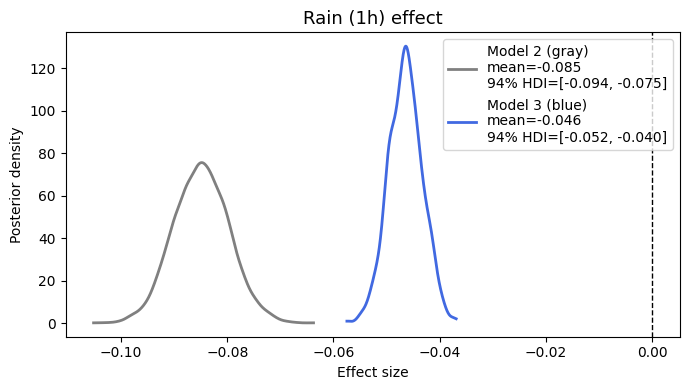

In [74]:
plot_variable_comparison(
    beta_nb_flat[:, 3],
    beta_hour_flat[:, 3],
    label="Rain (1h) effect",
    legend_loc="upper right",
    legend_bbox=None
)

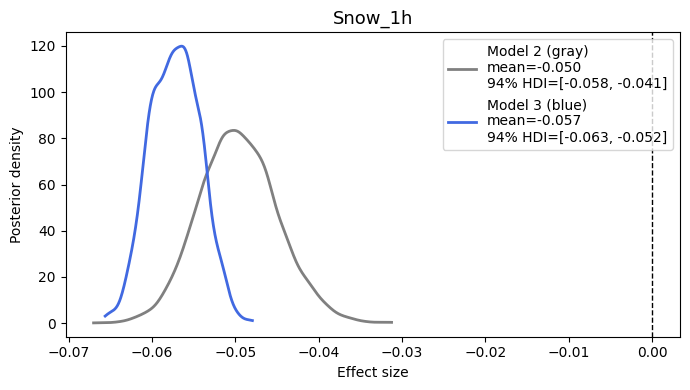

In [79]:
plot_variable_comparison(
    beta_nb_flat[:, 4],
    beta_hour_flat[:, 4],
    label="Snow_1h",
    legend_loc="upper right",
    legend_bbox=None
)

Model robustness
How robust are posterior conclusions to reasonable changes in prior assumptions?

In [83]:
with pm.Model() as model_hour_robust:

    # Intercept
    alpha = pm.Normal("alpha", mu=0, sigma=5)

    # Weather effects (STRONGER prior)
    beta = pm.Normal(
        "beta",
        mu=0,
        sigma=0.5,      # 👈 changed from 1.0
        shape=X_stdzd.shape[1]
    )

    # Hour-of-day structured effect (partial pooling)
    sigma_hour = pm.HalfNormal("sigma_hour", sigma=0.5)  # 👈 changed from 1.0
    hour_effect = pm.Normal(
        "hour_effect",
        mu=0,
        sigma=sigma_hour,
        shape=n_hours
    )

    # Linear predictor
    mu = (
        alpha
        + pm.math.dot(X_stdzd, beta)
        + hour_effect[hour_idx]
    )

    # Negative Binomial likelihood
    phi = pm.HalfNormal("phi", sigma=2)

    y_obs = pm.NegativeBinomial(
        "y_obs",
        mu=pm.math.exp(mu),
        alpha=phi,
        observed=y
    )

    # Sampling
    idata_hour_robust = pm.sample(
        draws=1000,
        tune=1000,
        chains=2,
        target_accept=0.9,
        random_seed=42
    )


 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.017       31           1.38 draws/s     0:24:09   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.015       15           1.59 s/draw      0:52:49   0:00:00

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


NEXT STEP = Final robustness comparison (Step-by-step)
Step 1 — Compare posterior means & intervals (numeric)

In [84]:
import arviz as az

summary_model3 = az.summary(
    idata_nb_hour,
    var_names=["beta"],
    hdi_prob=0.94
)

summary_model3_robust = az.summary(
    idata_hour_robust,
    var_names=["beta"],
    hdi_prob=0.94
)

summary_model3, summary_model3_robust


(          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
 beta[0]  0.388  0.004   0.380    0.394        0.0      0.0     688.0   
 beta[1] -0.101  0.004  -0.109   -0.093        0.0      0.0     616.0   
 beta[2]  0.035  0.004   0.028    0.041        0.0      0.0     623.0   
 beta[3] -0.046  0.003  -0.052   -0.040        0.0      0.0     621.0   
 beta[4] -0.057  0.003  -0.063   -0.052        0.0      0.0     550.0   
 
          ess_tail  r_hat  
 beta[0]     609.0    1.0  
 beta[1]     682.0    1.0  
 beta[2]     659.0    1.0  
 beta[3]     604.0    1.0  
 beta[4]     725.0    1.0  ,
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
 beta[0]  0.388  0.004   0.381    0.394        0.0      0.0     739.0   
 beta[1] -0.101  0.004  -0.108   -0.093        0.0      0.0     668.0   
 beta[2]  0.035  0.004   0.029    0.042        0.0      0.0     721.0   
 beta[3] -0.047  0.003  -0.053   -0.040        0.0      0.0     808.0   
 beta[4] -0.057  0.003  -0

Posterior comparison (Model 2 vs Model 3)

In [88]:
def plot_weather_comparison(
    idata_m2,
    idata_m3,
    beta_idx,
    var_name,
    legend_loc="upper left"
):
    # Extract posterior samples
    b2 = idata_m2.posterior["beta"].values[:, :, beta_idx].flatten()
    b3 = idata_m3.posterior["beta"].values[:, :, beta_idx].flatten()

    # Summary stats
    m2_mean = b2.mean()
    m3_mean = b3.mean()
    m2_hdi = az.hdi(b2, hdi_prob=0.94)
    m3_hdi = az.hdi(b3, hdi_prob=0.94)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 4))

    az.plot_kde(
        b2,
        ax=ax,
        plot_kwargs={"color": "gray", "linewidth": 2}
    )

    az.plot_kde(
        b3,
        ax=ax,
        plot_kwargs={"color": "royalblue", "linewidth": 2}
    )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)

    ax.set_title(var_name, fontsize=13)
    ax.set_xlabel("Effect size (log scale)")
    ax.set_ylabel("Posterior density")

    # Legend ONLY (no numbers inside plot)
    legend_text = [
        f"Model 2 (gray)\nmean={m2_mean:.3f}\n94% HDI=[{m2_hdi[0]:.3f}, {m2_hdi[1]:.3f}]",
        f"Model 3 (blue)\nmean={m3_mean:.3f}\n94% HDI=[{m3_hdi[0]:.3f}, {m3_hdi[1]:.3f}]",
    ]

    ax.legend(
        legend_text,
        loc=legend_loc,
        frameon=True,
        fontsize=9
    )

    plt.tight_layout()
    plt.show()


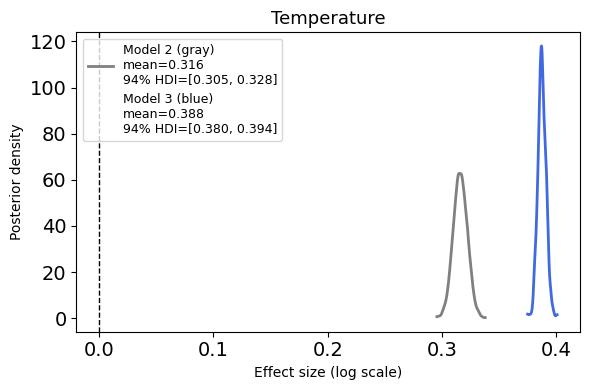

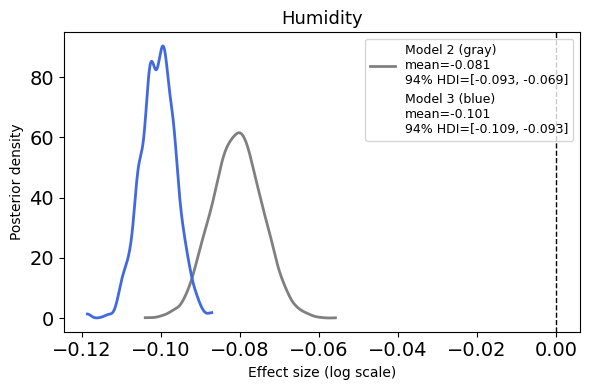

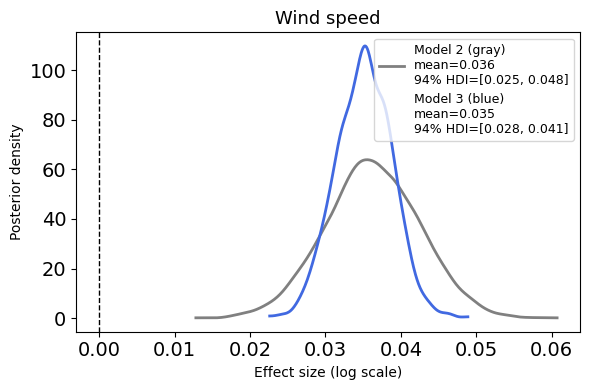

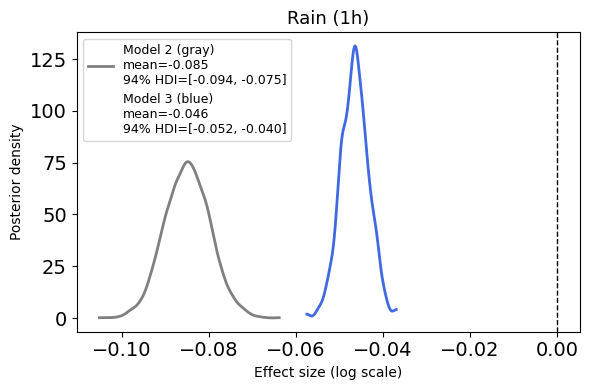

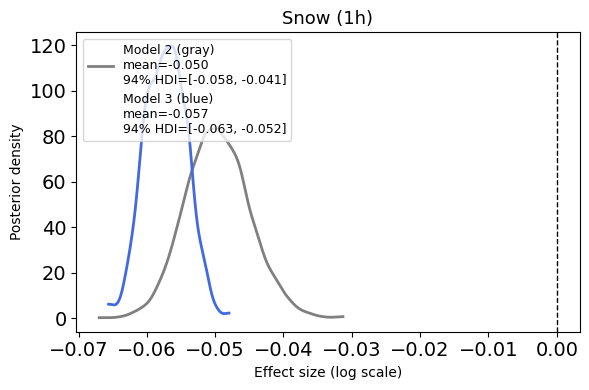

In [89]:
plot_weather_comparison(trace_nb, idata_nb_hour, 0, "Temperature", legend_loc="upper left")
plot_weather_comparison(trace_nb, idata_nb_hour, 1, "Humidity", legend_loc="upper right")
plot_weather_comparison(trace_nb, idata_nb_hour, 2, "Wind speed", legend_loc="upper right")
plot_weather_comparison(trace_nb, idata_nb_hour, 3, "Rain (1h)", legend_loc="upper left")
plot_weather_comparison(trace_nb, idata_nb_hour, 4, "Snow (1h)", legend_loc="upper left")


In [90]:
def plot_weather_comparison(
    idata_model2,
    idata_model3,
    beta_idx,
    title,
    legend_loc="upper left"
):
    # Extract posterior samples
    b2 = idata_model2.posterior["beta"].values[:, :, beta_idx].flatten()
    b3 = idata_model3.posterior["beta"].values[:, :, beta_idx].flatten()

    # Summary statistics
    m2_mean = b2.mean()
    m3_mean = b3.mean()
    m2_hdi = az.hdi(b2, hdi_prob=0.94)
    m3_hdi = az.hdi(b3, hdi_prob=0.94)

    # Create figure (ONE variable only)
    fig, ax = plt.subplots(figsize=(6, 4))

    az.plot_kde(
        b2,
        ax=ax,
        plot_kwargs={"color": "gray", "linewidth": 2}
    )

    az.plot_kde(
        b3,
        ax=ax,
        plot_kwargs={"color": "royalblue", "linewidth": 2}
    )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)

    ax.set_title(title, fontsize=13)
    ax.set_xlabel("Effect size (log scale)")
    ax.set_ylabel("Posterior density")

    # Legend ONLY (numbers live here)
    legend_labels = [
        f"Model 2 (gray)\nmean = {m2_mean:.3f}\n94% HDI = [{m2_hdi[0]:.3f}, {m2_hdi[1]:.3f}]",
        f"Model 3 (blue)\nmean = {m3_mean:.3f}\n94% HDI = [{m3_hdi[0]:.3f}, {m3_hdi[1]:.3f}]",
    ]

    ax.legend(
        legend_labels,
        loc=legend_loc,
        frameon=True,
        fontsize=9
    )

    plt.tight_layout()
    plt.show()

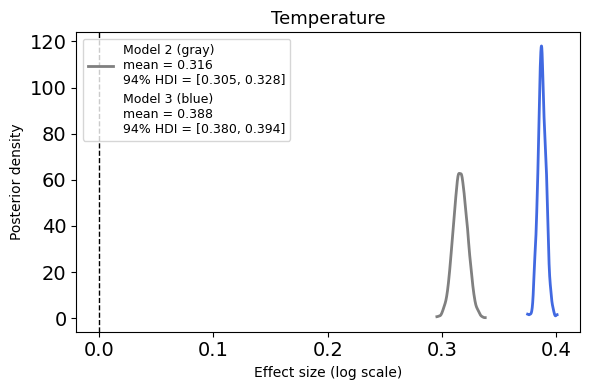

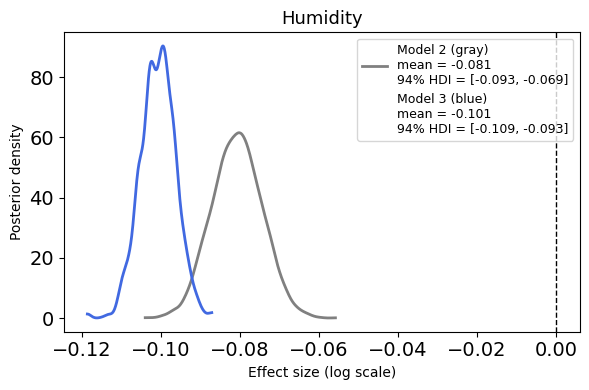

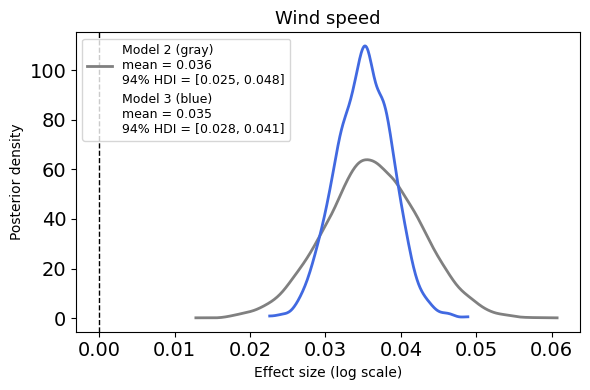

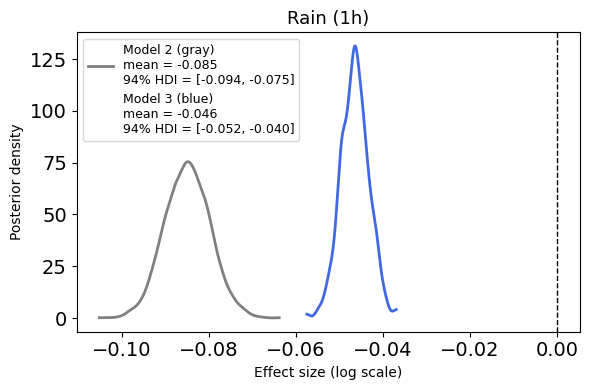

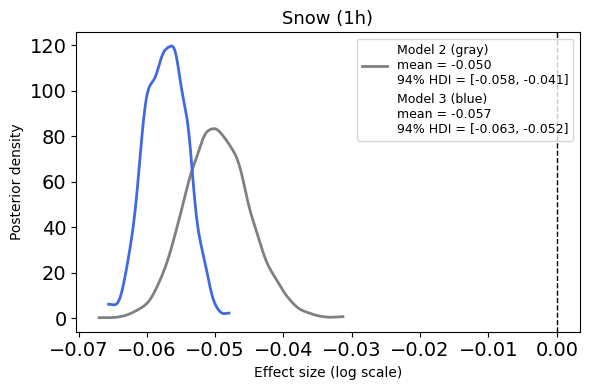

In [94]:
plot_weather_comparison(
    trace_nb,
    idata_nb_hour,
    beta_idx=0,
    title="Temperature",
    legend_loc="upper left"
)

plot_weather_comparison(
    trace_nb,
    idata_nb_hour,
    beta_idx=1,
    title="Humidity",
    legend_loc="upper right"
)

plot_weather_comparison(
    trace_nb,
    idata_nb_hour,
    beta_idx=2,
    title="Wind speed",
    legend_loc="upper left"
)

plot_weather_comparison(
    trace_nb,
    idata_nb_hour,
    beta_idx=3,
    title="Rain (1h)",
    legend_loc="upper left"
)

plot_weather_comparison(
    trace_nb,
    idata_nb_hour,
    beta_idx=4,
    title="Snow (1h)",
    legend_loc="upper right"
)